# Hierarchical Clustering

### Import library required
Library yang digunakan adalah **numpy, matplotlib, scipy, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Make Fake Data

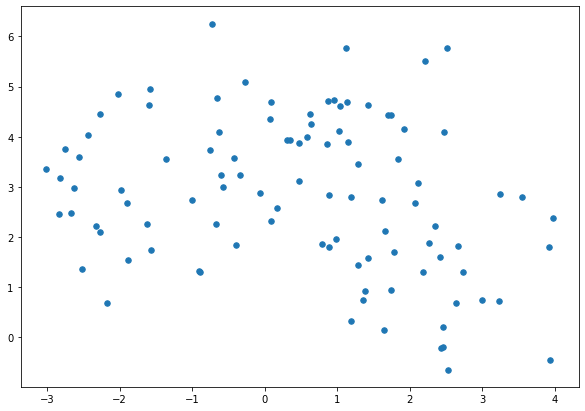

In [56]:
X, y = make_blobs(n_samples=100, centers=3, random_state=0)
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:, 1], s=30);

### Make Function
Fungsi ini dibuat untuk mempermudah melakakukan clustering dengan berbagai parameter.
- Parameter `method` digunakan untuk mengatur metode yang digunakan untuk menghitung jarak antar cluster, parameter ini dapat bernilai **single, complete, average, dan ward**. Defaultnya single.
- Parameter `metric` digunakan untuk mengatur metode yang digunakan untuk menghitung jarak antar observasi, parameter ini dapat bernilai **euclidean, manhattan, dan cosine**. Defaultnya euclidean.
- Parameter `n_cluster` digunakan untuk mengatur jumlah cluster yang dihasilkan.

Fungsi ini akan menghasilkan 2 plot, yaitu dendogram dan scatter plot hasil cluster. Jika jumlah feature lebih dari 2, yang akan tampil di scatter plot adalah feature pertama dan kedua.

Fungsi ini akan mengembalikan cluster label berupa angka dari 0 sampai n_cluster-1

In [64]:
def make_cluster(X, method = "single", metric = "euclidean", n_cluster = 2):
    X = np.array(X)
    plt.figure(figsize=(10, 7))
    plt.title("Dendograms. Method {}. Metric {}".format(method, metric))
    if (metric == "manhattan") :
        dend = dendrogram(linkage(X, method = method, metric = 'cityblock'))
    else :
        dend = dendrogram(linkage(X, method = method, metric = metric))
        
    cluster = AgglomerativeClustering(n_clusters = n_cluster, affinity = metric, linkage = method)
    cluster.fit_predict(X)
    plt.figure(figsize=(10,7))
    plt.title("Cluster = {}. Method {}. Metric {}".format(n_cluster, method, metric))
    plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
    return cluster.labels_

### Method Average, Metric Manhattan, Cluster = 3

array([1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 0,
       2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

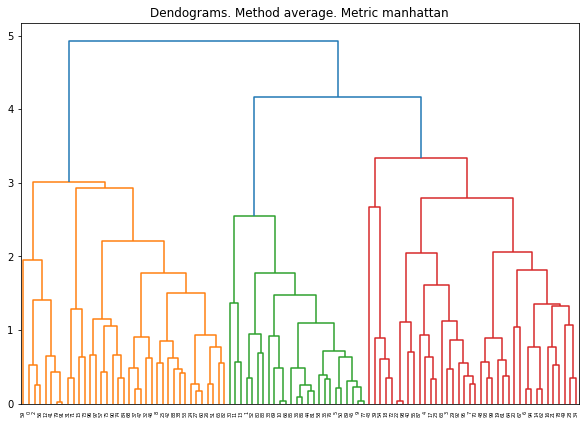

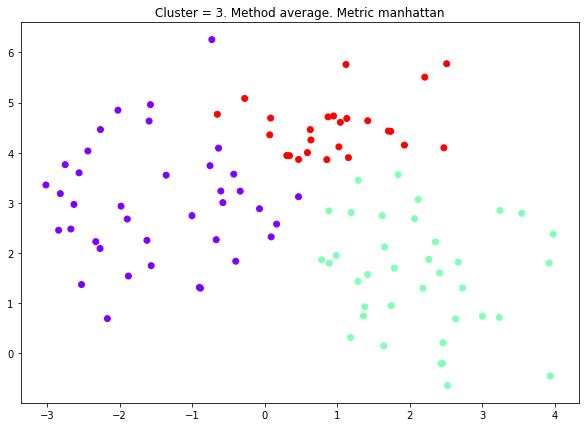

In [67]:
_ = make_cluster(X, method="average", metric = "manhattan", n_cluster=3)

### Method Complete, Metric Euclidean, Cluster = 5

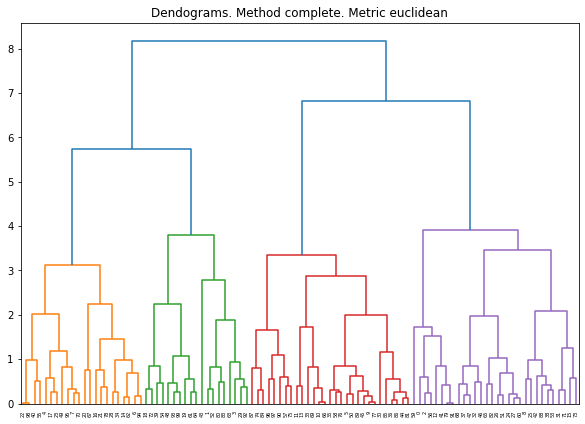

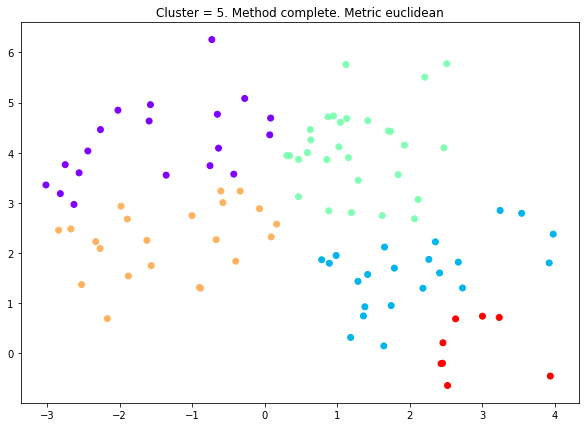

In [68]:
_ = make_cluster(X, method="complete", metric = "euclidean", n_cluster=5)

### Implementation in Iris Data

In [69]:
data = load_iris(as_frame=True)
X = data.data
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Method Ward, Metric Euclidean, Cluster = 3

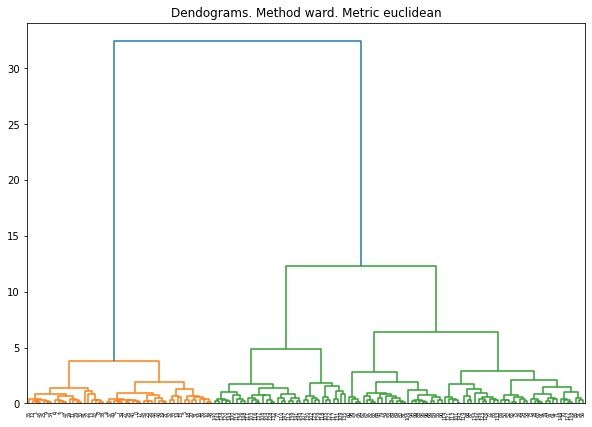

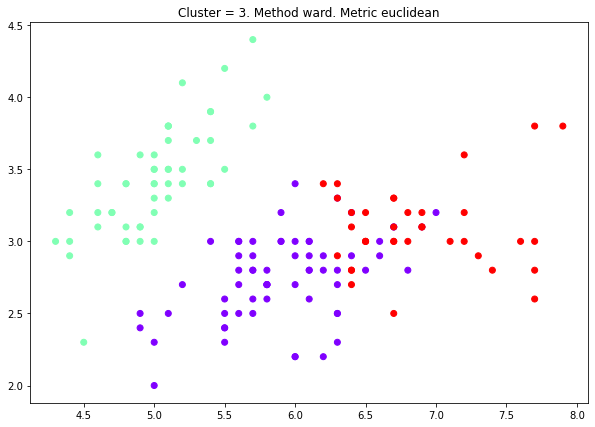

In [70]:
_ = make_cluster(X,  method = "ward", metric = "euclidean", n_cluster=3)

In [71]:
X.assign(cluster_predict = _)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_predict
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
